In [1]:
import numpy as np

In [2]:
from sklearn import cross_validation, datasets, metrics, neighbors 


/home/yuru/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [4]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

Напишем функии для визуализации обучения алгоритма.

In [7]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [10]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [21]:
def plot_decision_surface(n_neighbors, train_data, train_labels, 
                          colors = colors, light_colors = light_colors):
    
    estimator = neighbors.KNeighborsClassifier(n_neighbors)
    estimator.fit(train_data, train_labels)
    
    pyplot.figure(figsize = (15, 8))
    
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Classifier, number of neighbours =' + str(n_neighbors))

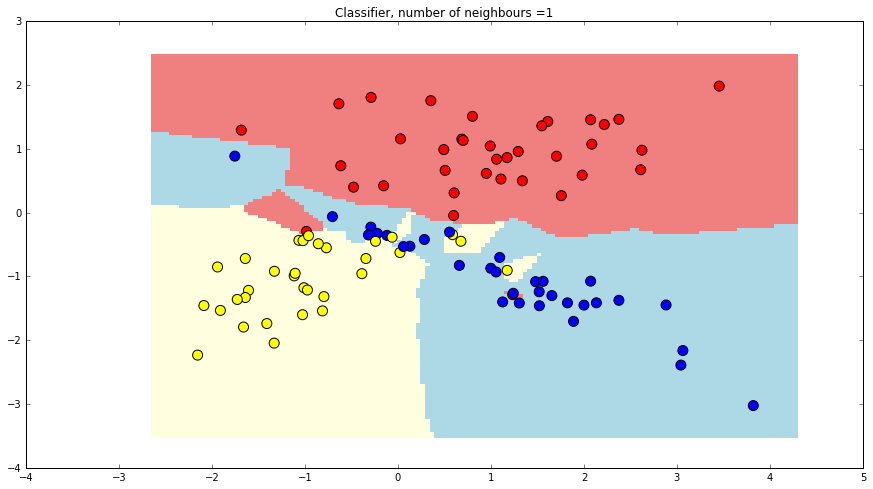

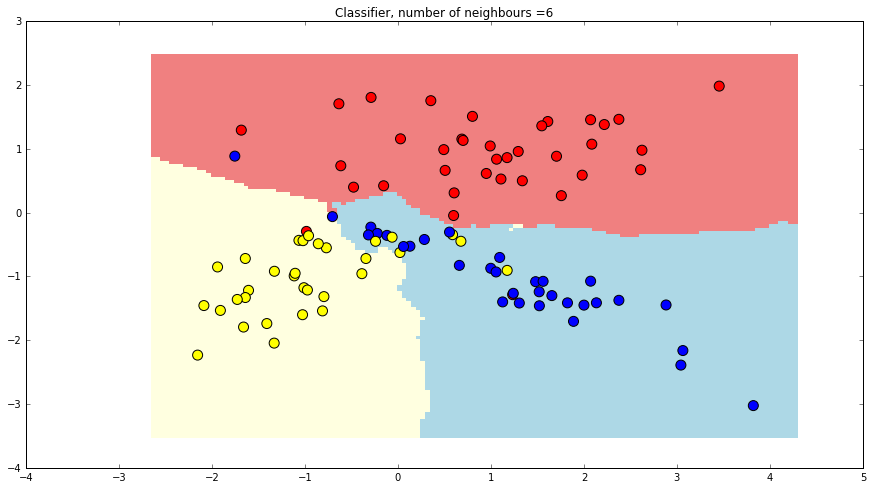

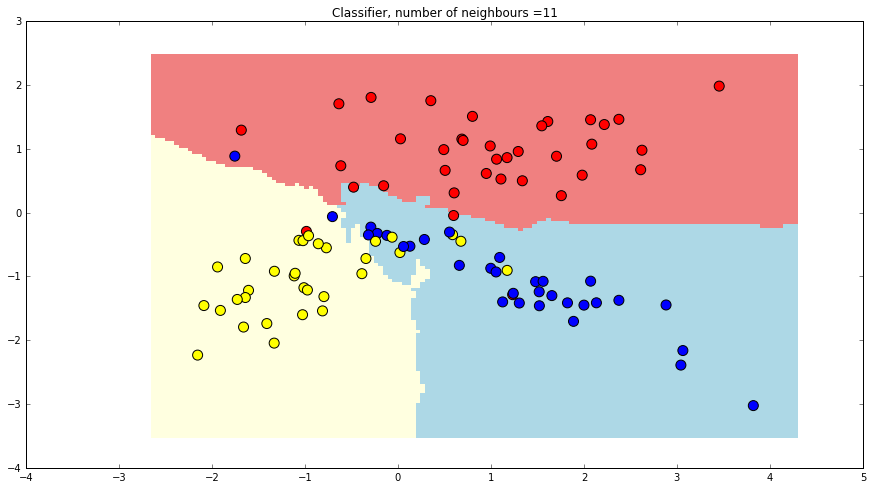

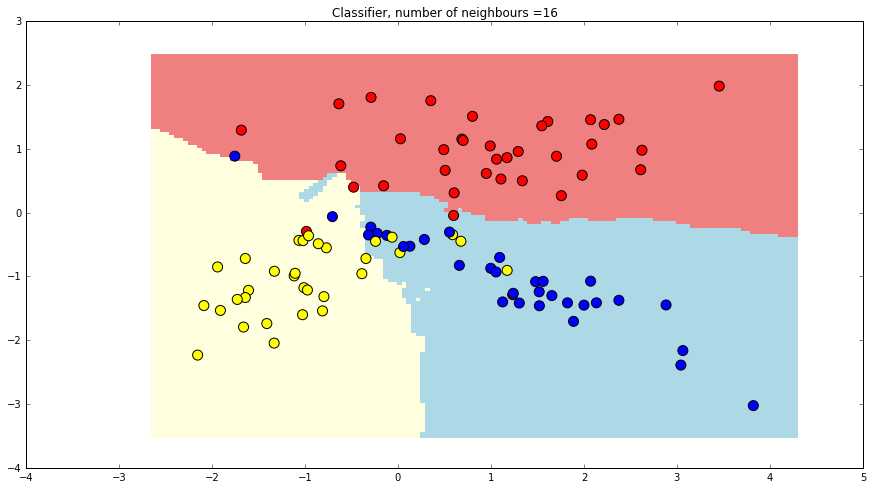

In [23]:
for k in np.arange(4) * 5 + 1:
    plot_decision_surface(k, classification_problem[0], classification_problem[1])

С помощью кросс-валидации измерим качество при всех $k$ и найдем оптимальное значение.

In [26]:
def get_quality(estimator, classification_problem, train_indices, test_indices):
    
    estimator.fit(classification_problem[0][train_indices], classification_problem[1][train_indices])
    
    return metrics.accuracy_score(
        classification_problem[1][test_indices], 
        estimator.predict(classification_problem[0][test_indices]))

In [50]:
def quality(k):
    answer = []
    for train_indices, test_indices in cross_validation.KFold(100, n_folds = 5):
        answer.append(get_quality(neighbors.KNeighborsClassifier(k), classification_problem,
                                  train_indices, test_indices))
    answer = np.array(answer)
    return np.mean(answer)

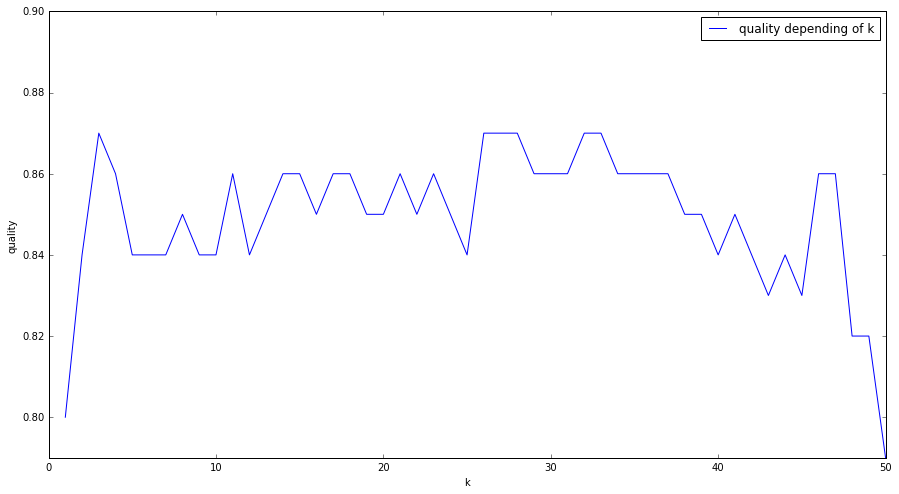

In [60]:
from matplotlib import pyplot as plt

X = np.arange(50) + 1
Y = []
for k in X:
    Y.append(quality(k))

plt.figure(figsize=(15,8))
plt.plot(X, Y, label='quality depending of k')
plt.xlabel('k')
plt.ylim(0.79, 0.9)
plt.ylabel('quality')
plt.legend()
plt.show()

Видим, что наилучшее значение точности достигается при $k = 4$. Кроме того, такое же значение точности достигается в районе $k=30$.